## <font color='blue'>Exploratory Analytics and Data Wrangling For E-Commerce Analytics</font>

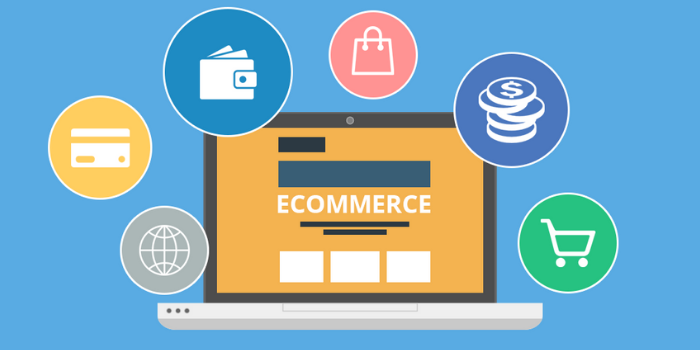

In [76]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [77]:
# Graphics configuration parameters
## Global parameters for all charts
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Loading the Dataset

In [78]:
# Loading the Dataset
df = pd.read_csv('datasets/dataset.csv')

In [79]:
df.shape

(11000, 12)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     11000 non-null  int64 
 1   warehouse_aisle        11000 non-null  object
 2   shipping_mode          11000 non-null  object
 3   number_customer_calls  11000 non-null  int64 
 4   customer_evaluation    11000 non-null  int64 
 5   product_cost           11000 non-null  int64 
 6   previous_purchases     11000 non-null  int64 
 7   product_priority       11000 non-null  object
 8   gender                 11000 non-null  object
 9   discount               11000 non-null  int64 
 10  weight_grams           11000 non-null  int64 
 11  delivered_on_time      11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [81]:
df['delivered_on_time'].unique()

array([1, 0], dtype=int64)

In [82]:
df.head(5)

,ID,warehouse_aisle,shipping_mode,number_customer_calls,customer_evaluation,product_cost,previous_purchases,product_priority,gender,discount,weight_grams,delivered_on_time
0,1,D,Airplane,4,2,177,3,low,F,44,1233,1
1,2,F,Airplane,4,5,216,2,low,M,59,3088,1
2,3,A,Airplane,2,2,183,4,low,M,48,3374,1
3,4,B,Airplane,3,3,176,4,medium,M,10,1177,1
4,5,C,Airplane,2,2,184,3,medium,F,46,2484,1


In [83]:
## View 05 random lines
## Random sample of data
df.sample(5)

,ID,warehouse_aisle,shipping_mode,number_customer_calls,customer_evaluation,product_cost,previous_purchases,product_priority,gender,discount,weight_grams,delivered_on_time
8543,8544,F,Ship,4,2,167,4,high,M,5,5250,0
5140,5141,C,Ship,4,5,231,4,medium,M,9,5528,0
1079,1080,F,Truck,2,4,141,3,medium,F,27,1628,1
455,456,F,Ship,4,1,149,3,medium,M,54,1178,1
1657,1658,F,Airplane,4,5,236,7,medium,F,44,3808,1


In [84]:
df.tail(5)

,ID,warehouse_aisle,shipping_mode,number_customer_calls,customer_evaluation,product_cost,previous_purchases,product_priority,gender,discount,weight_grams,delivered_on_time
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0
10999,11000,C,Ship,4,2,255,5,low,F,6,1739,0


## EDA - Part 1

### Separation of Categorical and Numerical Variables

In [85]:
df.columns

Index(['ID', 'warehouse_aisle', 'shipping_mode', 'number_customer_calls',
       'customer_evaluation', 'product_cost', 'previous_purchases',
       'product_priority', 'gender', 'discount', 'weight_grams',
       'delivered_on_time'],
      dtype='object')

In [86]:
df.dtypes

ID                        int64
warehouse_aisle          object
shipping_mode            object
number_customer_calls     int64
customer_evaluation       int64
product_cost              int64
previous_purchases        int64
product_priority         object
gender                   object
discount                  int64
weight_grams              int64
delivered_on_time         int64
dtype: object

In [87]:
# List of categorical columns
categorical = ['warehouse_aisle',
        'shipping_mode', 
        'product_priority', 
        'gender']

In [88]:
# List of numeric columns
## We do not include ID, as it has no analytical importance
## We don't include delivered_on_time as it is our Target variable
numerical = ['number_customer_calls', 
        'customer_evaluation', 
        'product_cost', 
        'previous_purchases', 
        'discount', 
        'weight_grams']

In [89]:
df['delivered_on_time'].unique()

array([1, 0], dtype=int64)

In [90]:
target = ['delivered_on_time']

### Exploring Numerical Variables

In [91]:
# Summary of numeric variables
df[numerical].describe()

,number_customer_calls,customer_evaluation,product_cost,previous_purchases,discount,weight_grams
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


Some observations:

1. The columns `number_customer_calls`, `customer_evaluation` and `product_cost` seem to have a fairly symmetrical distribution (mean and median are not very different).

2. Columns `previous_purchases` and `discount` appear to be skewed to the right (Mean greater than Median).

3. The `weight_grams` column appears to be leaning more to the left (Mean less than Median).

<AxesSubplot:>

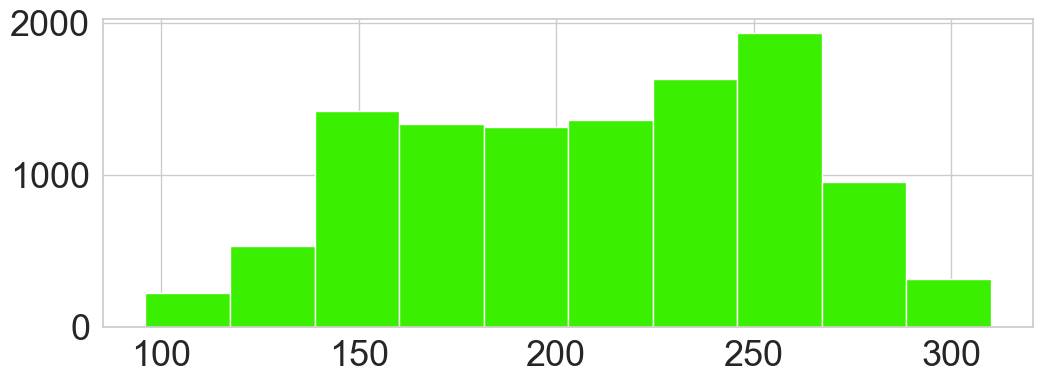

In [92]:
df['product_cost'].hist()

<AxesSubplot:>

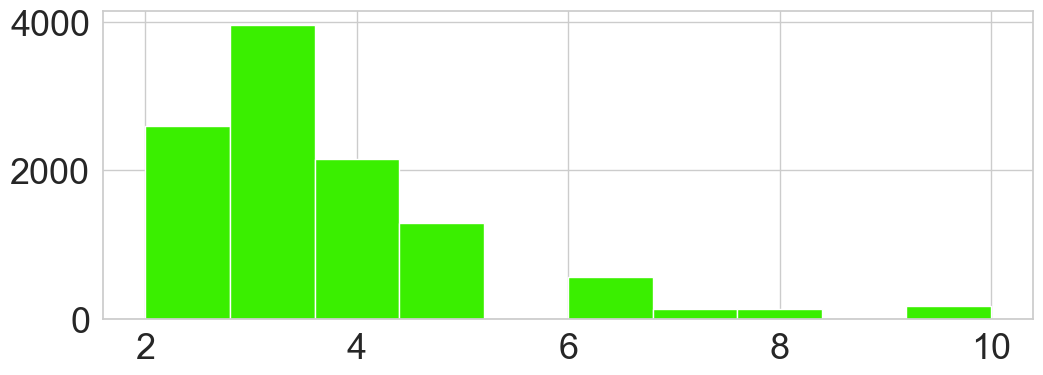

In [93]:
df['previous_purchases'].hist()

### Exploring Categorical Variables

In [94]:
# Summary of categorical variables
df[categorical].describe()

,warehouse_aisle,shipping_mode,product_priority,gender
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7463,5298,5546


Some observations:

* For the warehouse_aisle variable **F** is the dominant class.
* For the shipping mode variable **Ship** is the dominant class.
* For product priority variable **low** is the dominant class.
* For the gender variable, **F(Female)** is the ruling class.
* All unique values for each category are around **2-5 unique values**

In [95]:
for columns in categorical:
    print(f'''Total Records by Variable Category {columns}''')
    print(df[columns].value_counts())
    print()

Total Records by Variable Category warehouse_aisle
F    3666
D    1834
C    1834
A    1833
B    1833
Name: warehouse_aisle, dtype: int64

Total Records by Variable Category shipping_mode
Ship        7463
Airplane    1777
Truck       1760
Name: shipping_mode, dtype: int64

Total Records by Variable Category product_priority
low       5298
medium    4754
high       948
Name: product_priority, dtype: int64

Total Records by Variable Category gender
F    5546
M    5454
Name: gender, dtype: int64



In [96]:
# Listing the total by category of each categorical variable
for col in categorical:
    print(f'''Total Records By Variable Category {col}:''')
    print(df[col].value_counts())
    print()

Total Records By Variable Category warehouse_aisle:
F    3666
D    1834
C    1834
A    1833
B    1833
Name: warehouse_aisle, dtype: int64

Total Records By Variable Category shipping_mode:
Ship        7463
Airplane    1777
Truck       1760
Name: shipping_mode, dtype: int64

Total Records By Variable Category product_priority:
low       5298
medium    4754
high       948
Name: product_priority, dtype: int64

Total Records By Variable Category gender:
F    5546
M    5454
Name: gender, dtype: int64



### Univariate Analysis - Box Plots

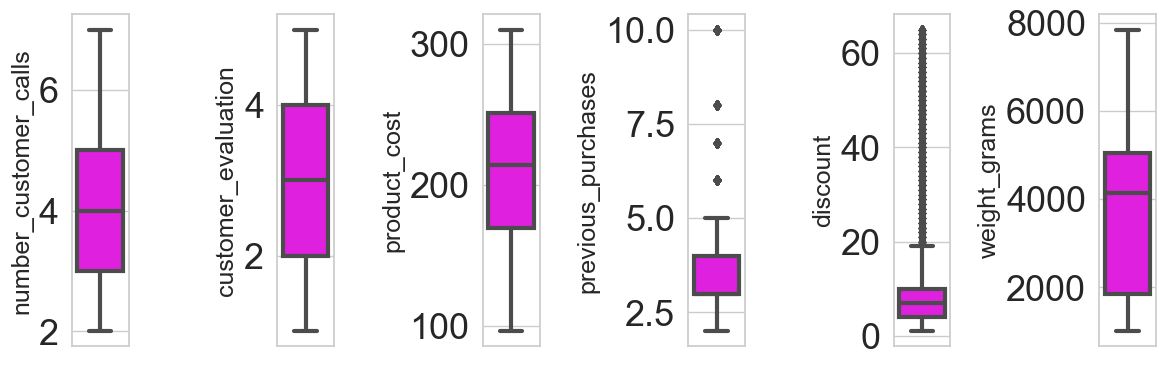

In [97]:
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i + 1)
    sns.boxplot(y = df[numerical[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

### Univariate Analysis - Dist Plots

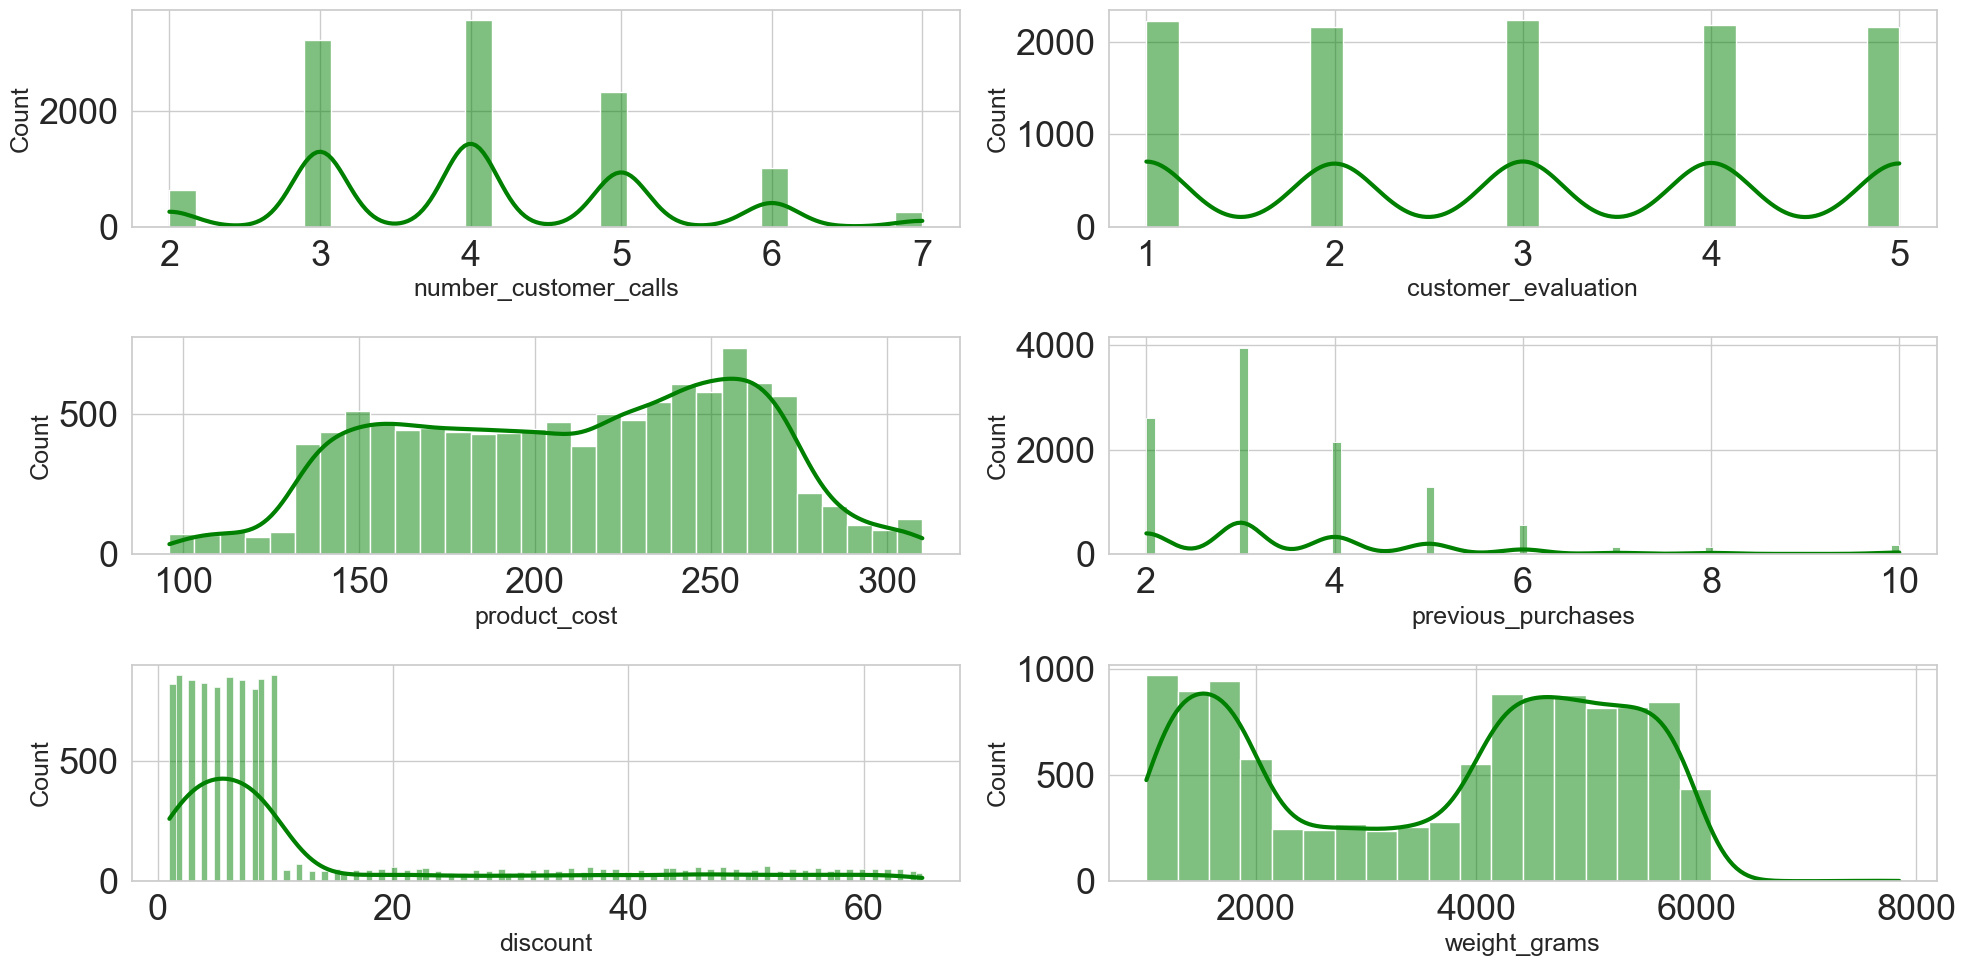

In [98]:
plt.figure(figsize=(20,10))
for i in range(0, len(numerical)):
    plt.subplot(3, int(len(numerical)/3), i + 1)
    sns.histplot(x = df[numerical[i]], kde = True, color = 'green')
    plt.xlabel(numerical[i])
    plt.tight_layout()

### Univariate Analysis - Violin Plots

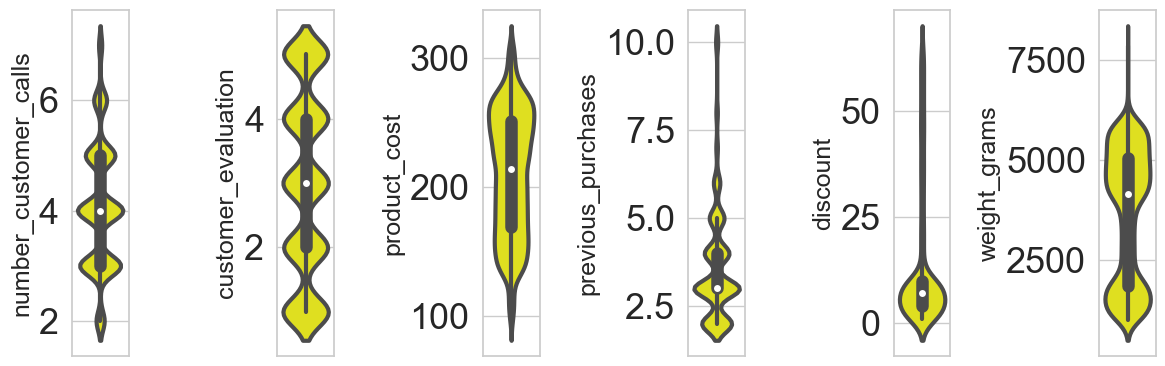

In [99]:
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.violinplot(y = df[numerical[i]], color = 'yellow', orient = 'v')
    plt.tight_layout()

From the graphs it can be seen that:

* The `product_cost` column appears to be close to a normal distribution.

* As we suspect, the `previous_purchases` and `discount` columns are *skewed* slightly, meaning there's a possibility we may need to do something with these columns later.

* For the `weight_grams` column there is distribution uncertainty because it is u-shaped.

* Columns `number_customer_calls` and `customer_evaluation` are evenly distributed.

### Univariate Analysis - Count Plot (Categorical)

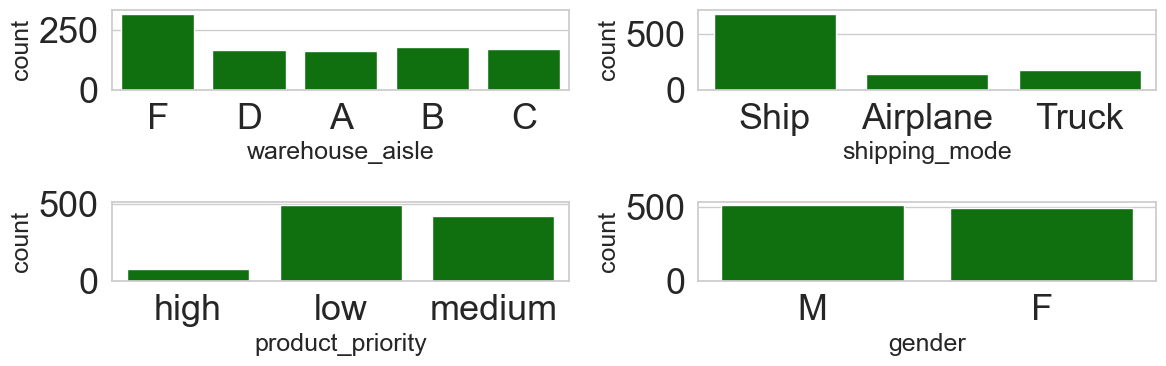

In [100]:
## Get a sample of 1000 records
## random_state makes it possible to reproduce the process keeping the same pattern
df_sample = df.sample(1000, random_state = 42)
for i in range(0, len(categorical)):
    plt.subplot(2, len(categorical) - 2, i+1)
    sns.countplot(x = df_sample[categorical[i]], color = 'green', orient = 'v')
    plt.tight_layout()

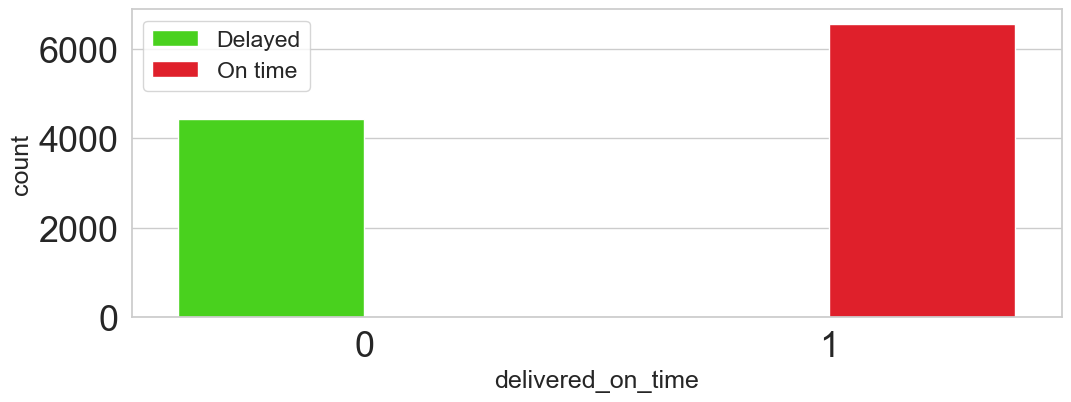

In [101]:
# CountPlot da variável target
sns.countplot(
    data = df, 
    x = df['delivered_on_time'], 
    hue = 'delivered_on_time')

plt.legend(labels = ['Delayed', 'On time'])

From the graphs it can be seen that:

*Most of the products shipped came from aisle F.

* Shipping mode via Ship is most common.

* There are few products with high delivery priority.

* The proportion of Male and Female customers is practically the same.

* The `delivered_on_time` column is binary, so there is no need to pay much attention to the shape of the distribution.

### Bivariate Analysis - Correlation Map

In [102]:
# Tabela de correlação
corr_df = df[numerical].corr()
corr_df

,number_customer_calls,customer_evaluation,product_cost,previous_purchases,discount,weight_grams
number_customer_calls,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
customer_evaluation,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
product_cost,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
previous_purchases,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
discount,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
weight_grams,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


<AxesSubplot:>

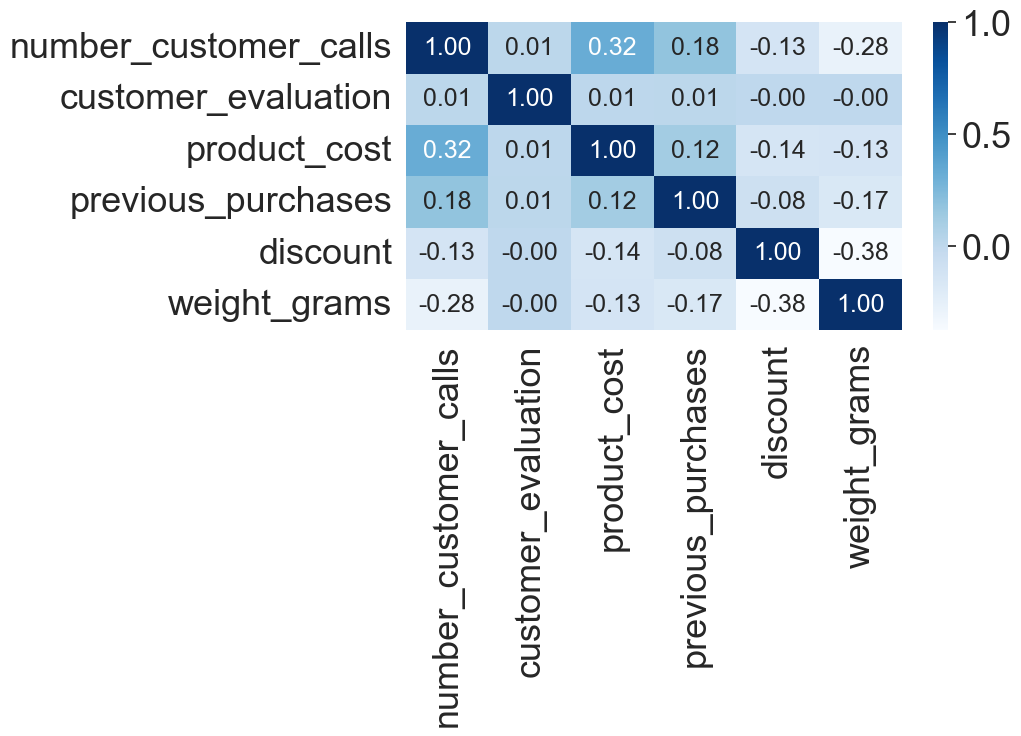

In [103]:
# Gráfico de correlação. Mapa de correlação
plt.figure(figsize = (8,4))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f')

From the above *correlation map* it can be seen that:

* There is a positive correlation between `number_customer_calls` and `product_cost`.
* There is a positive correlation between `number_customer_calls` and `previous_purchases`.
* There is a negative correlation between `discount` and `weight_grams`.
* And there is a weak correlation between the other variables.

Note: We do not use correlation for categorical variables. In this case we use association.

### Bivariate Analysis - Pair Plot

<Figure size 1000x1000 with 0 Axes>

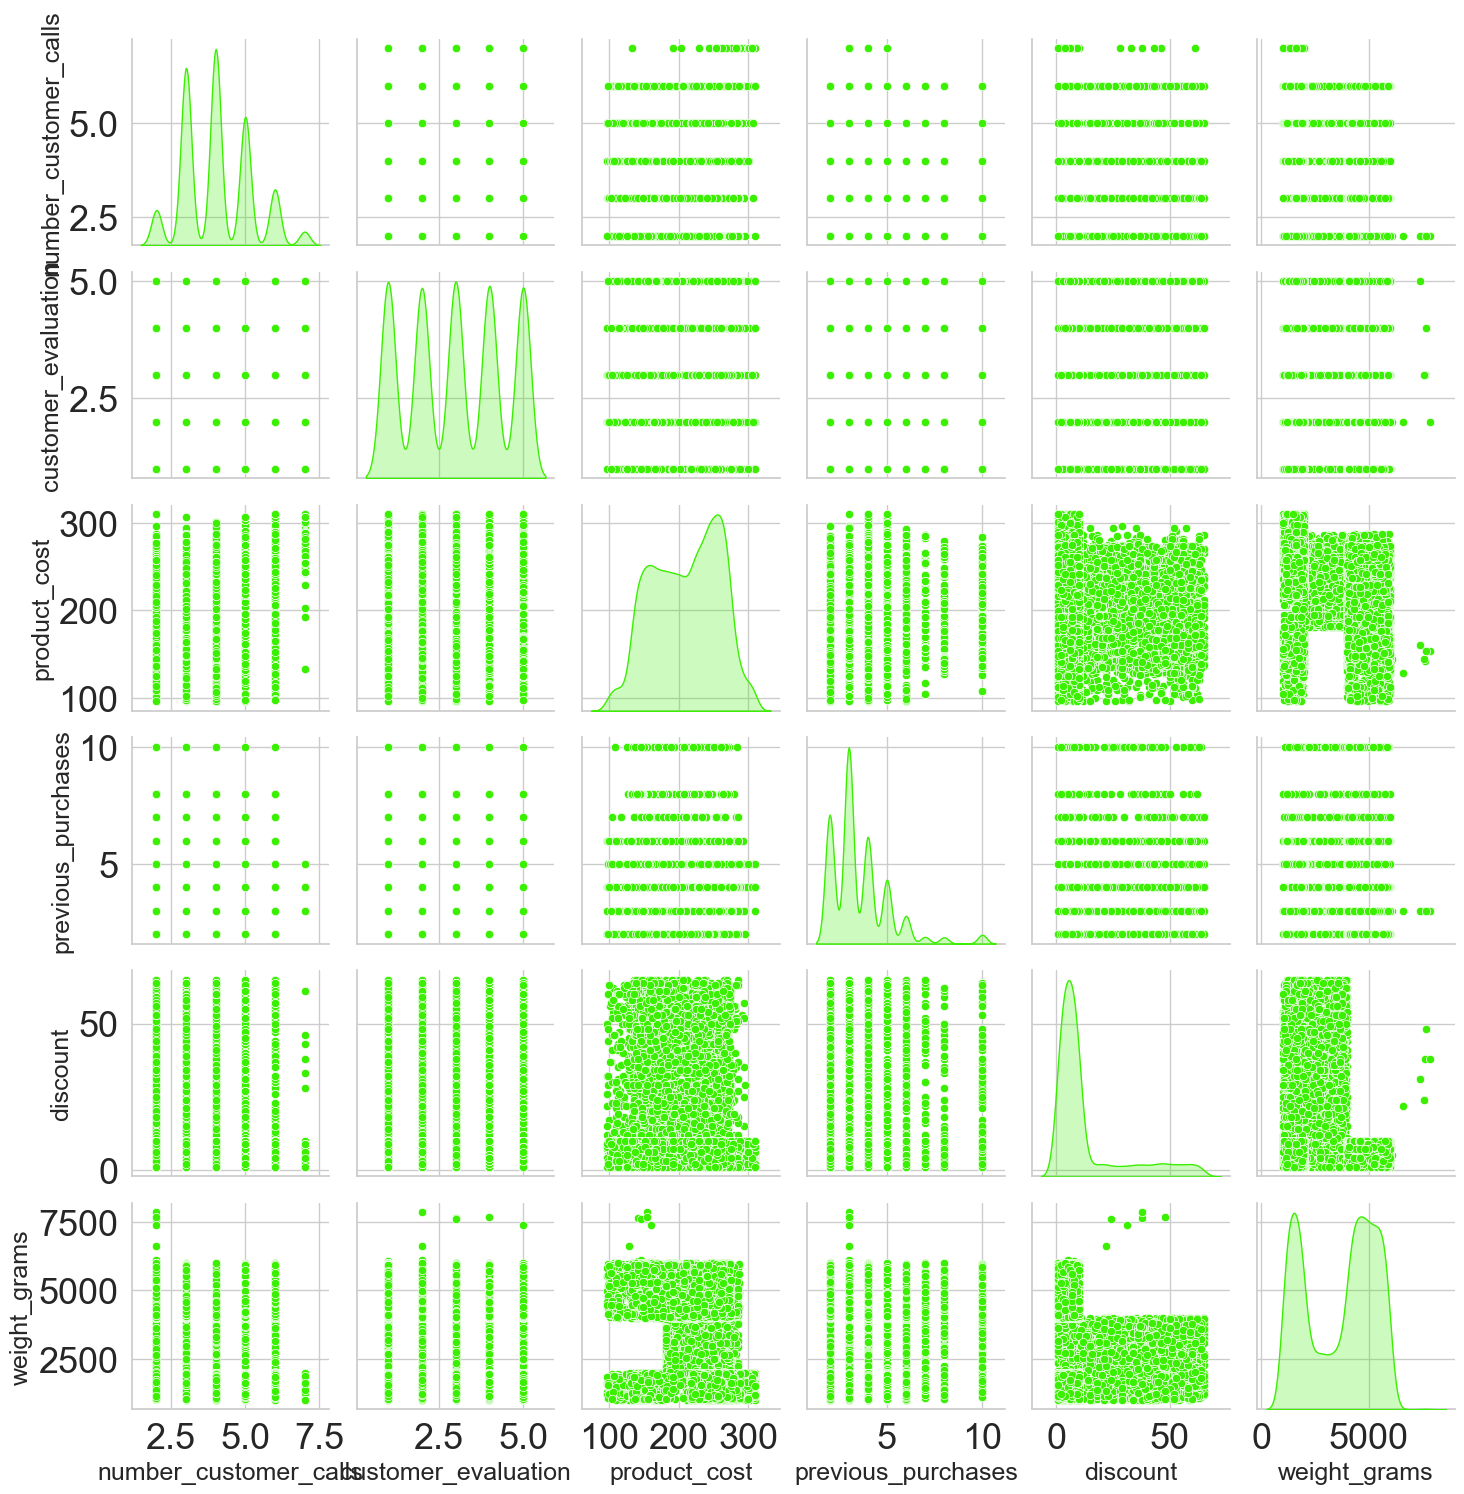

In [104]:
plt.figure(figsize = (10, 10))
sns.pairplot(df[numerical], diag_kind = 'kde')

### Categorical Columns x Target Variable

In [105]:
df.columns

Index(['ID', 'warehouse_aisle', 'shipping_mode', 'number_customer_calls',
       'customer_evaluation', 'product_cost', 'previous_purchases',
       'product_priority', 'gender', 'discount', 'weight_grams',
       'delivered_on_time'],
      dtype='object')

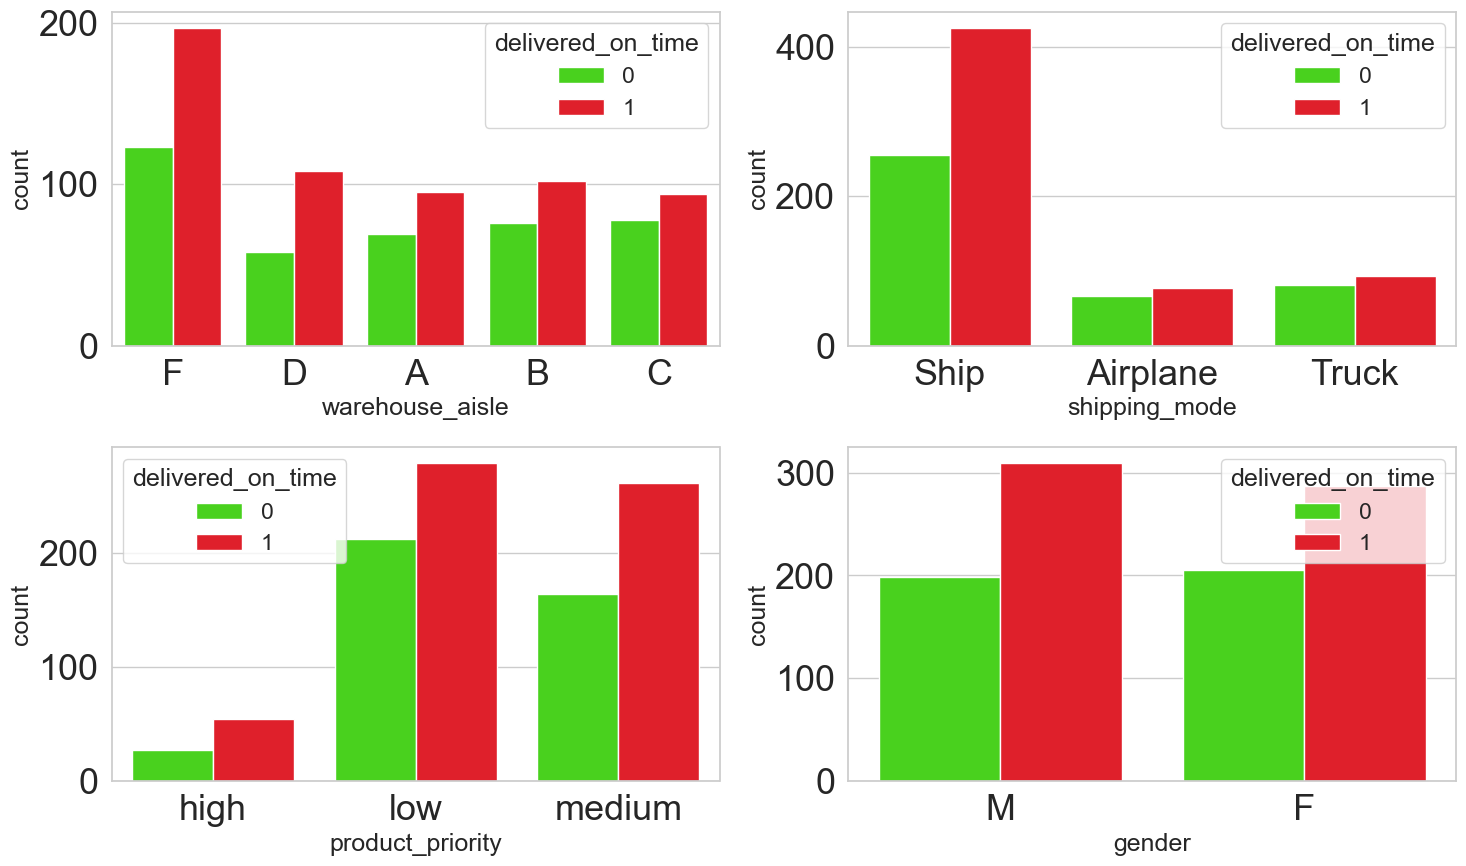

In [106]:
## Analyze each categorical variable with the target variable
plt.figure(figsize = (15, 9))

for i in range(0, len(categorical)):
    plt.subplot(2, 2, i+1) 
    sns.countplot(data = df_sample, x = categorical[i], hue = 'delivered_on_time')
    plt.tight_layout()

Comments:

* Shipping by ship tends to be late in delivery.
* In product_priority the low and medium categories tend to have delays in delivery.
* In warehouse_aisle, products from corridor F tend to be late in delivery.
* Products purchased by women have a slightly lower volume of on-time deliveries.

## Conclusion of EDA Part 1:

Some of the things we found in this dataset are:

* Data appears valid and there are no major/significant defects.

* There are some distributions that are a bit *asymmetrical*, this should be remembered if using models that require the assumption of a normal distribution.

* We did not detect multicollinearity problems.

* Some *features* seem completely uncorrelated.

* Of the categorical features, `shipping_mode` , `warehouse_aisle` and `importancia_product` seem useful for predicting the target variable.

## EDA - Part 2

### 1- Are delivery delays evenly distributed across shipping modes? Are there discrepant differences?

In [107]:
df.columns

Index(['ID', 'warehouse_aisle', 'shipping_mode', 'number_customer_calls',
       'customer_evaluation', 'product_cost', 'previous_purchases',
       'product_priority', 'gender', 'discount', 'weight_grams',
       'delivered_on_time'],
      dtype='object')

In [108]:
## See which method is most used for sending
df['shipping_mode'].value_counts()

Ship        7463
Airplane    1777
Truck       1760
Name: shipping_mode, dtype: int64

In [109]:
## Let's group by ID so we can see the unique values.
df_group1 = df.groupby(['delivered_on_time', 'shipping_mode']).agg({'ID' : 'nunique'}).reset_index()
df_group1

,delivered_on_time,shipping_mode,ID
0,0,Airplane,708
1,0,Ship,3004
2,0,Truck,725
3,1,Airplane,1069
4,1,Ship,4459
5,1,Truck,1035


In [110]:
df_group2 = df.groupby('delivered_on_time').agg({'ID' : 'nunique'}).reset_index() 
df_group2

,delivered_on_time,ID
0,0,4437
1,1,6563


In [111]:
## let's merge the two tables created earlier
df_group3 = df_group1.merge(df_group2, on = 'delivered_on_time')
df_group3

,delivered_on_time,shipping_mode,ID_x,ID_y
0,0,Airplane,708,4437
1,0,Ship,3004,4437
2,0,Truck,725,4437
3,1,Airplane,1069,6563
4,1,Ship,4459,6563
5,1,Truck,1035,6563


In [112]:
## Let's do a grouping only with shipping_mode
df_group4 = df.groupby('shipping_mode').agg({'ID' : 'nunique'}).reset_index() 
df_group4

,shipping_mode,ID
0,Airplane,1777
1,Ship,7463
2,Truck,1760


In [113]:
## Now let's concatenate table 1 and 4, to have those of Delivered and Late by delivery mode
## So let's have the total of the category in the ID_y
## In the ID_x the division by Delivered and Late by shipping category
df_group5 = df_group1.merge(df_group4, on = 'shipping_mode')
df_group5

,delivered_on_time,shipping_mode,ID_x,ID_y
0,0,Airplane,708,1777
1,1,Airplane,1069,1777
2,0,Ship,3004,7463
3,1,Ship,4459,7463
4,0,Truck,725,1760
5,1,Truck,1035,1760


In [114]:
## Calculate the Percentage column to demonstrate the ratio
df_group5['Percentual(%)'] = df_group5['ID_x'] / df_group5['ID_y'] * 100

In [115]:
## New column names
df_group5.columns = ['Status On Time Delivery',
                      'Sending Mode',
                      'Total Per Category',
                      'Grand total',
                      'Percentage(%)']
df_group5

,Status On Time Delivery,Sending Mode,Total Per Category,Grand total,Percentage(%)
0,0,Airplane,708,1777,39.842431
1,1,Airplane,1069,1777,60.157569
2,0,Ship,3004,7463,40.251909
3,1,Ship,4459,7463,59.748091
4,0,Truck,725,1760,41.193182
5,1,Truck,1035,1760,58.806818


In [116]:
df_group5.columns

Index(['Status On Time Delivery', 'Sending Mode', 'Total Per Category',
       'Grand total', 'Percentage(%)'],
      dtype='object')

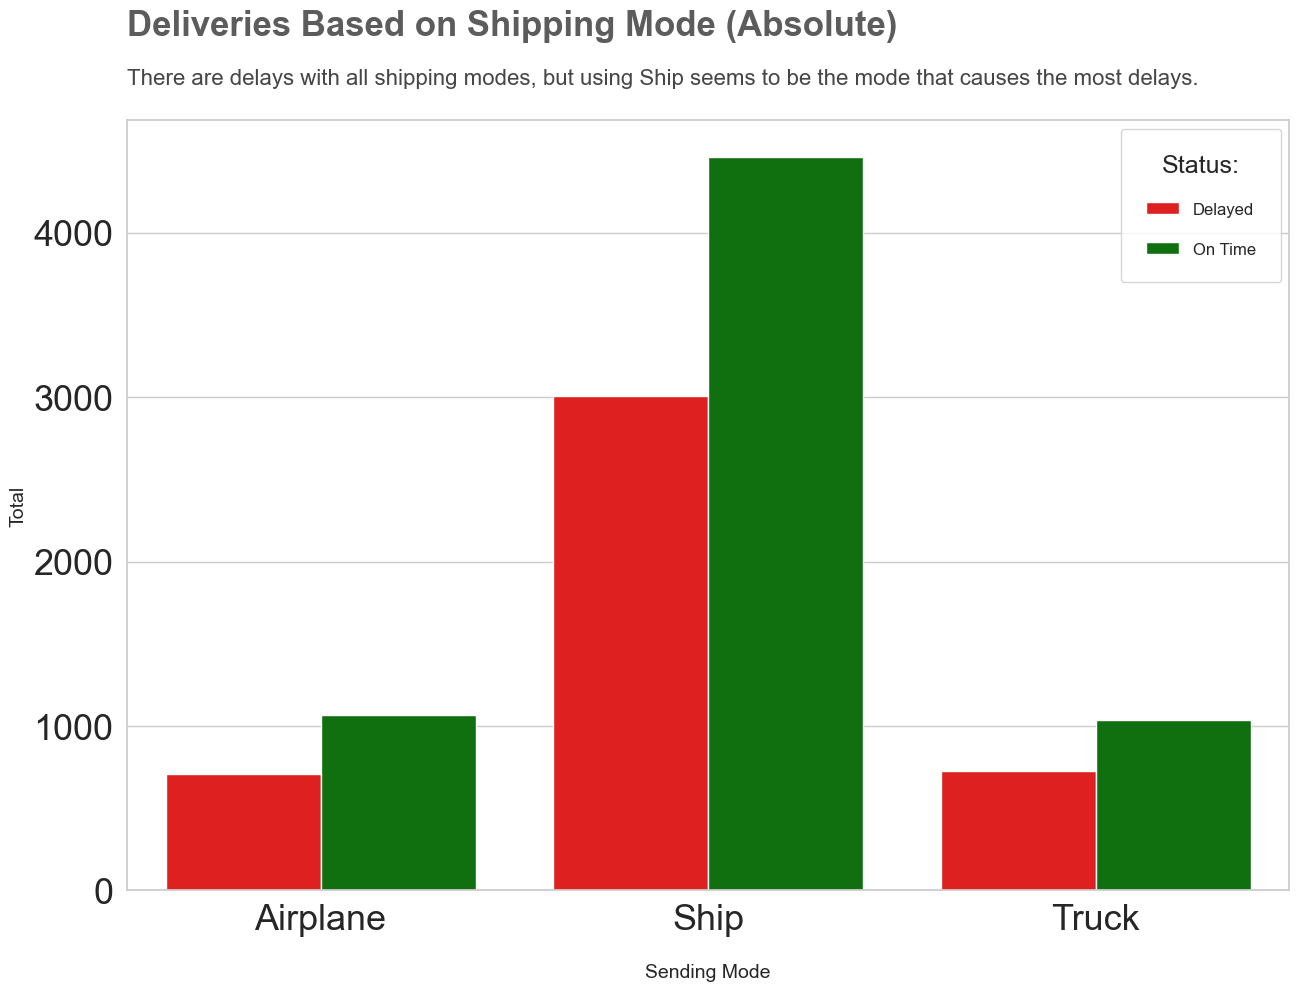

In [117]:
# Graph 1 - Analysis in Absolute Values

# figure size
plt.figure(figsize = (15,10))

# chart
## As data we are using the original dataframe
## the eyxo x is the shipping_mode
## the HUE is the target variable, delivered_on_time, to be able to have the division by class
chart = sns.countplot(data = df, 
                      x = 'shipping_mode', 
                      hue = 'delivered_on_time',
                      palette = ["red","green"])

# Style and labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nSending Mode", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)

# Legend
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:',
           labels=(['Delayed', 'On Time']))

# Adding Title
chart.text(x = -0.5, 
           y = 5200, 
           s = "Deliveries Based on Shipping Mode (Absolute)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Added Sub-Title
chart.text(x = -0.5, 
           y = 4900,
           s = 'There are delays with all shipping modes, but using Ship seems to be the mode that causes the most delays.',
           fontsize = 16, 
           alpha = .85);

In [118]:
df_group5.columns

Index(['Status On Time Delivery', 'Sending Mode', 'Total Per Category',
       'Grand total', 'Percentage(%)'],
      dtype='object')

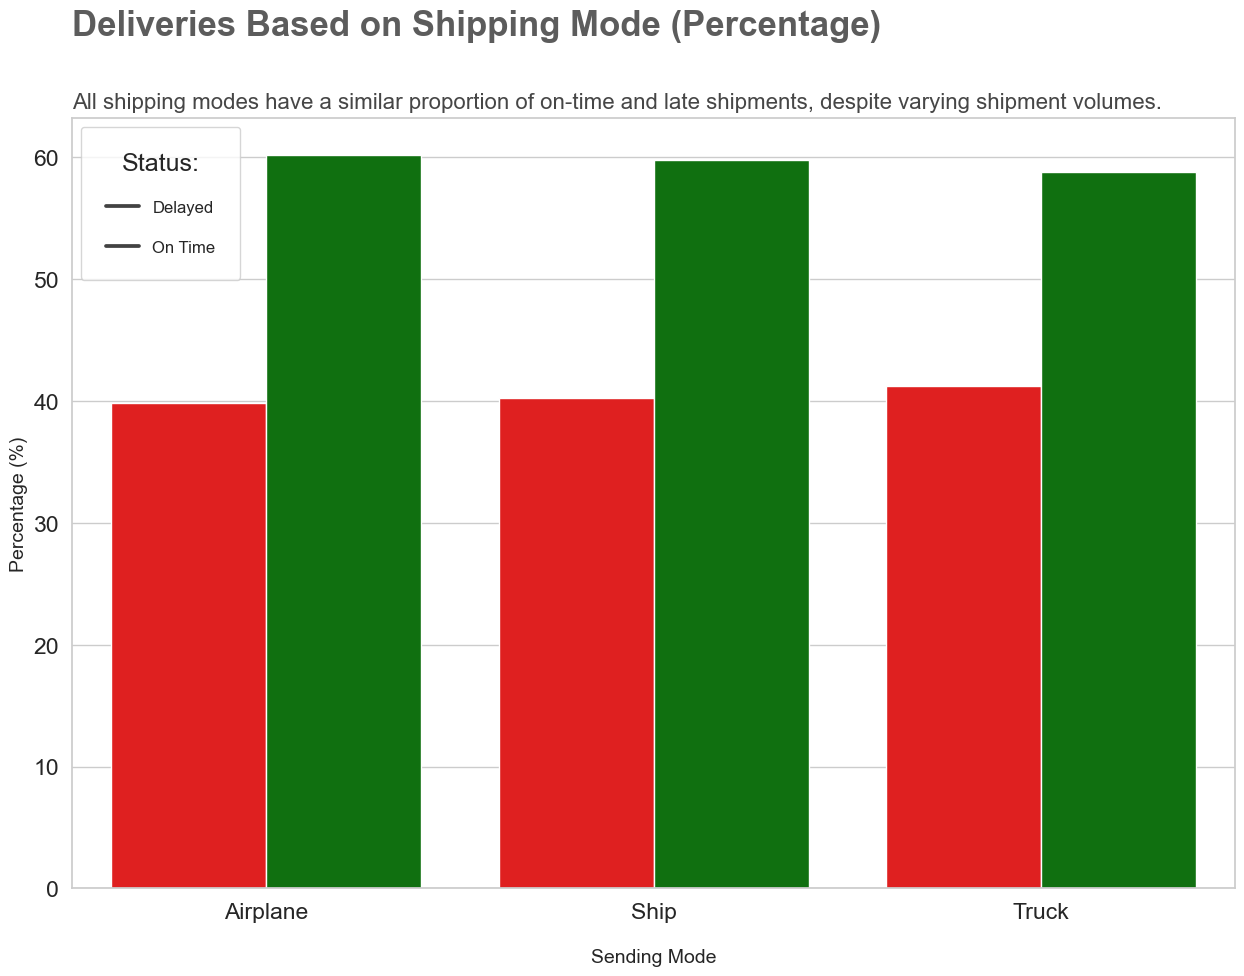

In [119]:
# Graph 2 - Analysis in Percentage Values

# figure size
plt.figure(figsize = (15,10))

# Chart
chart = sns.barplot(x = 'Sending Mode', 
                    y = 'Percentage(%)', 
                    data = df_group5, 
                    hue = 'Status On Time Delivery',
                    palette = ["red","green"])

# Style and labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nSending Mode", fontsize = 14)
chart.set_ylabel("Percentage (%)", fontsize = 14)

# Legend
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:',
           labels=(['Delayed', 'On Time']))

# Title
chart.text(x = -0.5, 
           y = 70, 
           s = "Deliveries Based on Shipping Mode (Percentage)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Subtitle
chart.text(x = -0.5, 
           y = 64,
           s = 'All shipping modes have a similar proportion of on-time and late shipments, despite varying shipment volumes.',
           fontsize = 16, 
           alpha = .85);

### 2- Is there a significant difference in delivery delays when the product has low or medium priority?

In [120]:
df.columns

Index(['ID', 'warehouse_aisle', 'shipping_mode', 'number_customer_calls',
       'customer_evaluation', 'product_cost', 'previous_purchases',
       'product_priority', 'gender', 'discount', 'weight_grams',
       'delivered_on_time'],
      dtype='object')

In [121]:
## Now is to see the priority in the product
df_group11 = df.groupby(['delivered_on_time','product_priority']).agg({'ID' : 'nunique'}).reset_index()
df_group11

,delivered_on_time,product_priority,ID
0,0,high,332
1,0,low,2158
2,0,medium,1947
3,1,high,616
4,1,low,3140
5,1,medium,2807


In [122]:
df_group12 = df.groupby('delivered_on_time').agg({'ID' : 'nunique'}).reset_index() 
df_group12

,delivered_on_time,ID
0,0,4437
1,1,6563


In [123]:
## Merge to join the 11 and 12
## Here the ID_y takes into account the total number of records for each class of the target variable
df_group13 = df_group11.merge(df_group12, on = 'delivered_on_time')
df_group13

,delivered_on_time,product_priority,ID_x,ID_y
0,0,high,332,4437
1,0,low,2158,4437
2,0,medium,1947,4437
3,1,high,616,6563
4,1,low,3140,6563
5,1,medium,2807,6563


In [124]:
df_group14 = df.groupby('product_priority').agg({'ID' : 'nunique'}).reset_index() 
df_group14

,product_priority,ID
0,high,948
1,low,5298
2,medium,4754


In [125]:
## Here, unlike df_group13, ID_y is the total records for the category
df_group15 = df_group11.merge(df_group14, on = 'product_priority')
df_group15

,delivered_on_time,product_priority,ID_x,ID_y
0,0,high,332,948
1,1,high,616,948
2,0,low,2158,5298
3,1,low,3140,5298
4,0,medium,1947,4754
5,1,medium,2807,4754


In [126]:
## In the group13 table, we calculate the percentage of each of the product priority categories
## Based on the Grand Total of the Target Variable by each category
df_group13['Percentage(%)'] = df_group13['ID_x'] / df_group13['ID_y'] * 100
df_group13.columns = ['Status On Time Delivery',
                       'Product Priority',
                       'Total Per Category',
                       'Grand total',
                       'Percentage(%)']
df_group13

,Status On Time Delivery,Product Priority,Total Per Category,Grand total,Percentage(%)
0,0,high,332,4437,7.482533
1,0,low,2158,4437,48.636466
2,0,medium,1947,4437,43.881001
3,1,high,616,6563,9.385952
4,1,low,3140,6563,47.843974
5,1,medium,2807,6563,42.770075


In [127]:
df_group15['Percentage(%)'] = df_group15['ID_x'] / df_group15['ID_y'] * 100
df_group15.columns = ['Status On Time Delivery',
                       'Product Priority',
                       'Total Per Category',
                       'Grand total',
                       'Percentage(%)']
df_group15

,Status On Time Delivery,Product Priority,Total Per Category,Grand total,Percentage(%)
0,0,high,332,948,35.021097
1,1,high,616,948,64.978903
2,0,low,2158,5298,40.732352
3,1,low,3140,5298,59.267648
4,0,medium,1947,4754,40.954985
5,1,medium,2807,4754,59.045015


In [128]:
df.columns

Index(['ID', 'warehouse_aisle', 'shipping_mode', 'number_customer_calls',
       'customer_evaluation', 'product_cost', 'previous_purchases',
       'product_priority', 'gender', 'discount', 'weight_grams',
       'delivered_on_time'],
      dtype='object')

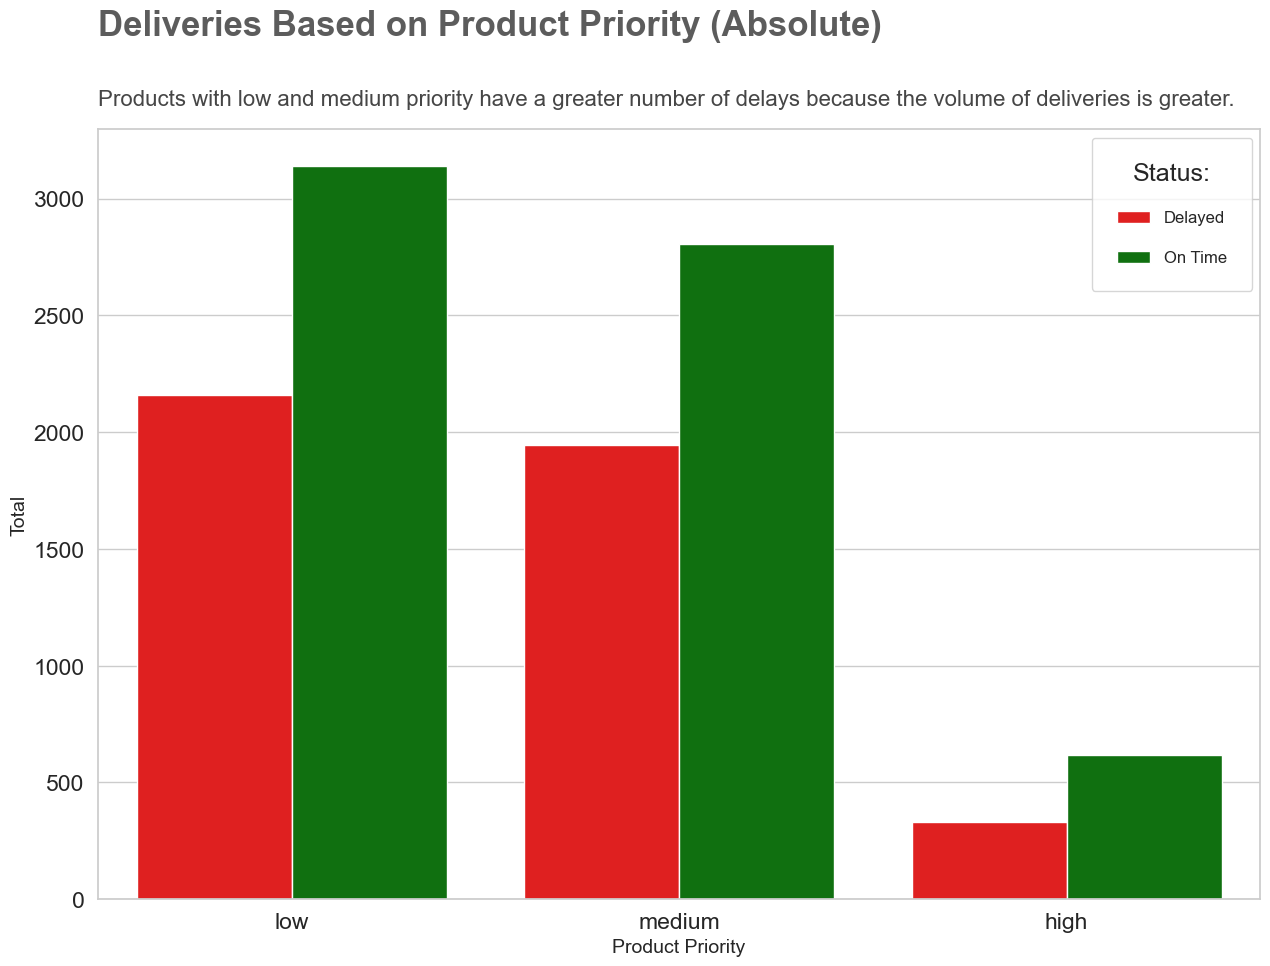

In [129]:
# Graph 1 - Analysis in Absolute Values
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'product_priority', 
                      hue = 'delivered_on_time',
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Product Priority", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:',
           labels=(['Delayed', 'On Time']))
chart.text(x = -0.5, 
           y = 3700, 
           s = "Deliveries Based on Product Priority (Absolute)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 3400,
           s = 'Products with low and medium priority have a greater number of delays because the volume of deliveries is greater.',
           fontsize = 16, 
           alpha = .85);

In [130]:
df_group15.columns

Index(['Status On Time Delivery', 'Product Priority', 'Total Per Category',
       'Grand total', 'Percentage(%)'],
      dtype='object')

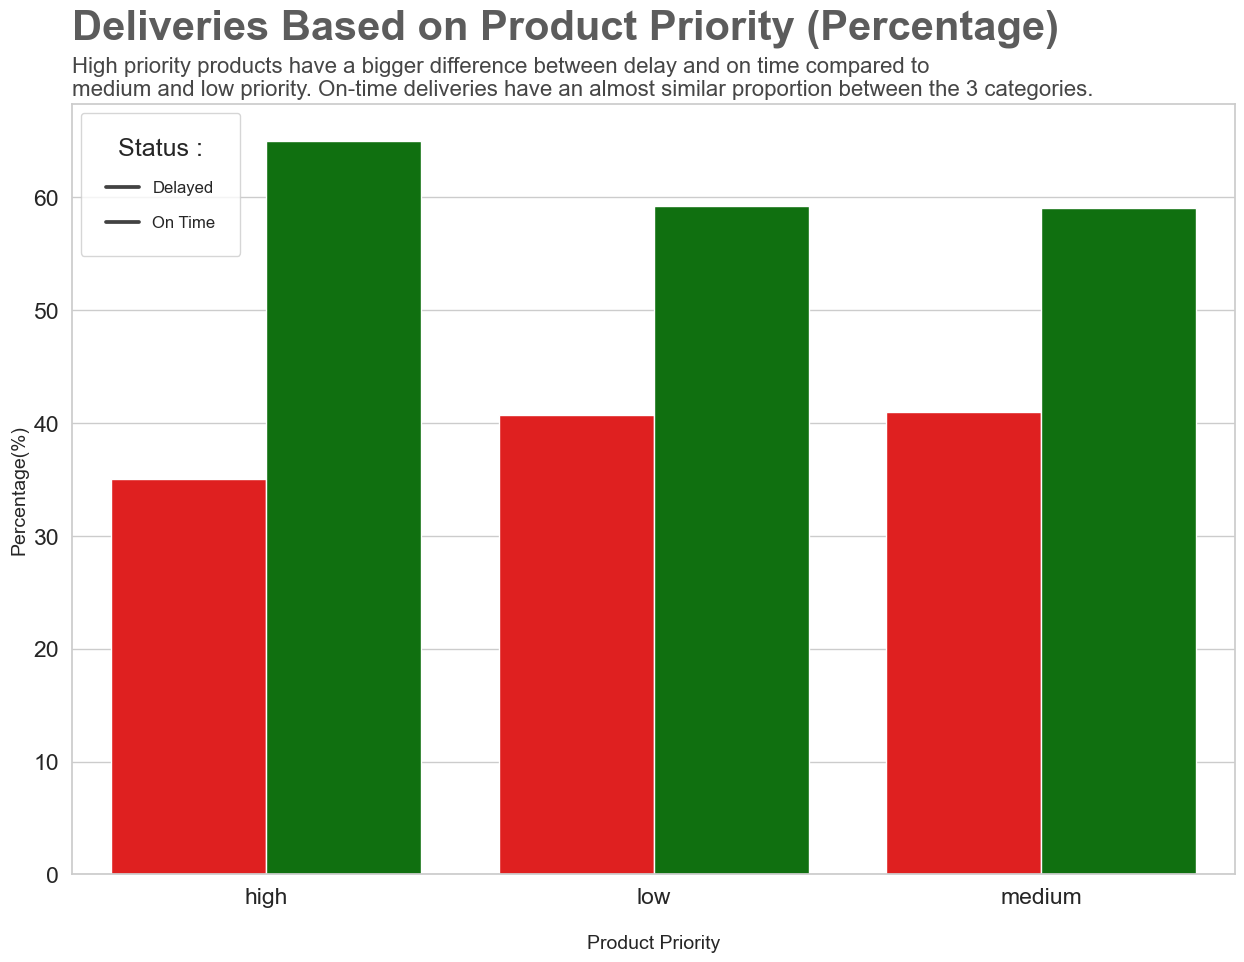

In [132]:
# Graph 2 - Analysis in Percentage Values
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Product Priority', 
                    y = 'Percentage(%)', 
                    data = df_group15, 
                    hue = 'Status On Time Delivery',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nProduct Priority", fontsize = 14)
chart.set_ylabel("Percentage(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status :',
           labels=(['Delayed', 'On Time']))
chart.text(x = -0.5, 
           y = 74, 
           s = "Deliveries Based on Product Priority (Percentage)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 69,
           s = 'High priority products have a bigger difference between delay and on time compared to \nmedium and low priority. On-time deliveries have an almost similar proportion between the 3 categories.',
            fontsize = 16,
            alpha = .85);

### 3- Which aisles store products with the highest proportion of late deliveries?

In [57]:
df.columns

Index(['ID', 'warehouse_aisle', 'shipping_mode', 'number_customer_calls',
       'customer_evaluation', 'product_cost', 'previous_purchases',
       'product_priority', 'gender', 'discount', 'weight_grams',
       'delivered_on_time'],
      dtype='object')

In [58]:
df_group21 = df.groupby(['delivered_on_time','warehouse_aisle']).agg({'ID' : 'nunique'}).reset_index()
df_group21

,delivered_on_time,warehouse_aisle,ID
0,0,A,758
1,0,B,729
2,0,C,740
3,0,D,738
4,0,F,1472
5,1,A,1075
6,1,B,1104
7,1,C,1094
8,1,D,1096
9,1,F,2194


In [59]:
df_group22 = df.groupby('delivered_on_time').agg({'ID' : 'nunique'}).reset_index() 
df_group22

,delivered_on_time,ID
0,0,4437
1,1,6563


In [60]:
df_group23 = df_group21.merge(df_group22, on = 'delivered_on_time')
df_group23

,delivered_on_time,warehouse_aisle,ID_x,ID_y
0,0,A,758,4437
1,0,B,729,4437
2,0,C,740,4437
3,0,D,738,4437
4,0,F,1472,4437
5,1,A,1075,6563
6,1,B,1104,6563
7,1,C,1094,6563
8,1,D,1096,6563
9,1,F,2194,6563


In [61]:
df_group23['Percentage(%)'] = df_group23['ID_x'] / df_group23['ID_y'] * 100
df_group23.columns = ['On Time Delivery Status',
                       'Warehouse Aisle',
                       'Total Per Category',
                       'Grand total',
                       'Percentage(%)']
df_group23

,On Time Delivery Status,Warehouse Aisle,Total Per Category,Grand total,Percentage(%)
0,0,A,758,4437,17.083615
1,0,B,729,4437,16.430020
2,0,C,740,4437,16.677936
3,0,D,738,4437,16.632860
4,0,F,1472,4437,33.175569
5,1,A,1075,6563,16.379704
6,1,B,1104,6563,16.821575
7,1,C,1094,6563,16.669206
8,1,D,1096,6563,16.699680
9,1,F,2194,6563,33.429834


In [62]:
df_group24 = df.groupby('warehouse_aisle').agg({'ID' : 'nunique'}).reset_index() 
df_group24

,warehouse_aisle,ID
0,A,1833
1,B,1833
2,C,1834
3,D,1834
4,F,3666


In [63]:
df_group25 = df_group21.merge(df_group24, on = 'warehouse_aisle')
df_group25

,delivered_on_time,warehouse_aisle,ID_x,ID_y
0,0,A,758,1833
1,1,A,1075,1833
2,0,B,729,1833
3,1,B,1104,1833
4,0,C,740,1834
5,1,C,1094,1834
6,0,D,738,1834
7,1,D,1096,1834
8,0,F,1472,3666
9,1,F,2194,3666


In [64]:
df_group25['Percentage(%)'] = df_group25['ID_x'] / df_group25['ID_y'] * 100
df_group25.columns = ['On Time Delivery Status',
                       'Warehouse Aisle',
                       'Total Per Category',
                       'Grand total',
                       'Percentage(%)']
df_group25

,On Time Delivery Status,Warehouse Aisle,Total Per Category,Grand total,Percentage(%)
0,0,A,758,1833,41.352973
1,1,A,1075,1833,58.647027
2,0,B,729,1833,39.770867
3,1,B,1104,1833,60.229133
4,0,C,740,1834,40.348964
5,1,C,1094,1834,59.651036
6,0,D,738,1834,40.239913
7,1,D,1096,1834,59.760087
8,0,F,1472,3666,40.152755
9,1,F,2194,3666,59.847245


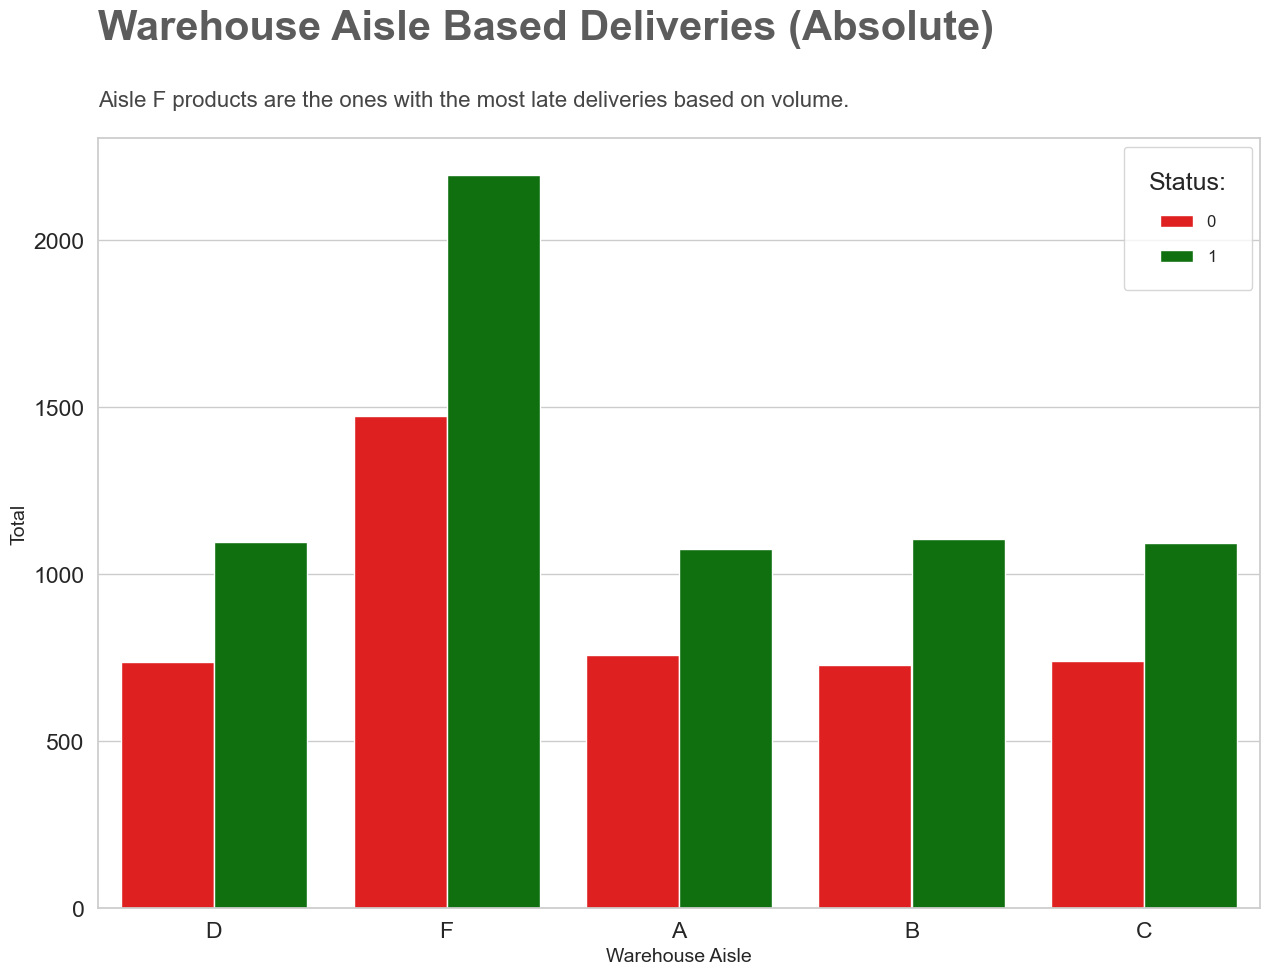

In [65]:
# Graph 1 - Analysis in Absolute Values
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'warehouse_aisle', 
                      hue = 'delivered_on_time', 
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Warehouse Aisle", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 2600, 
           s = "Warehouse Aisle Based Deliveries (Absolute)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 2400,
           s = 'Aisle F products are the ones with the most late deliveries based on volume.',
           fontsize = 16, 
           alpha = .85);

In [66]:
df_group25.columns

Index(['On Time Delivery Status', 'Warehouse Aisle', 'Total Per Category',
       'Grand total', 'Percentage(%)'],
      dtype='object')

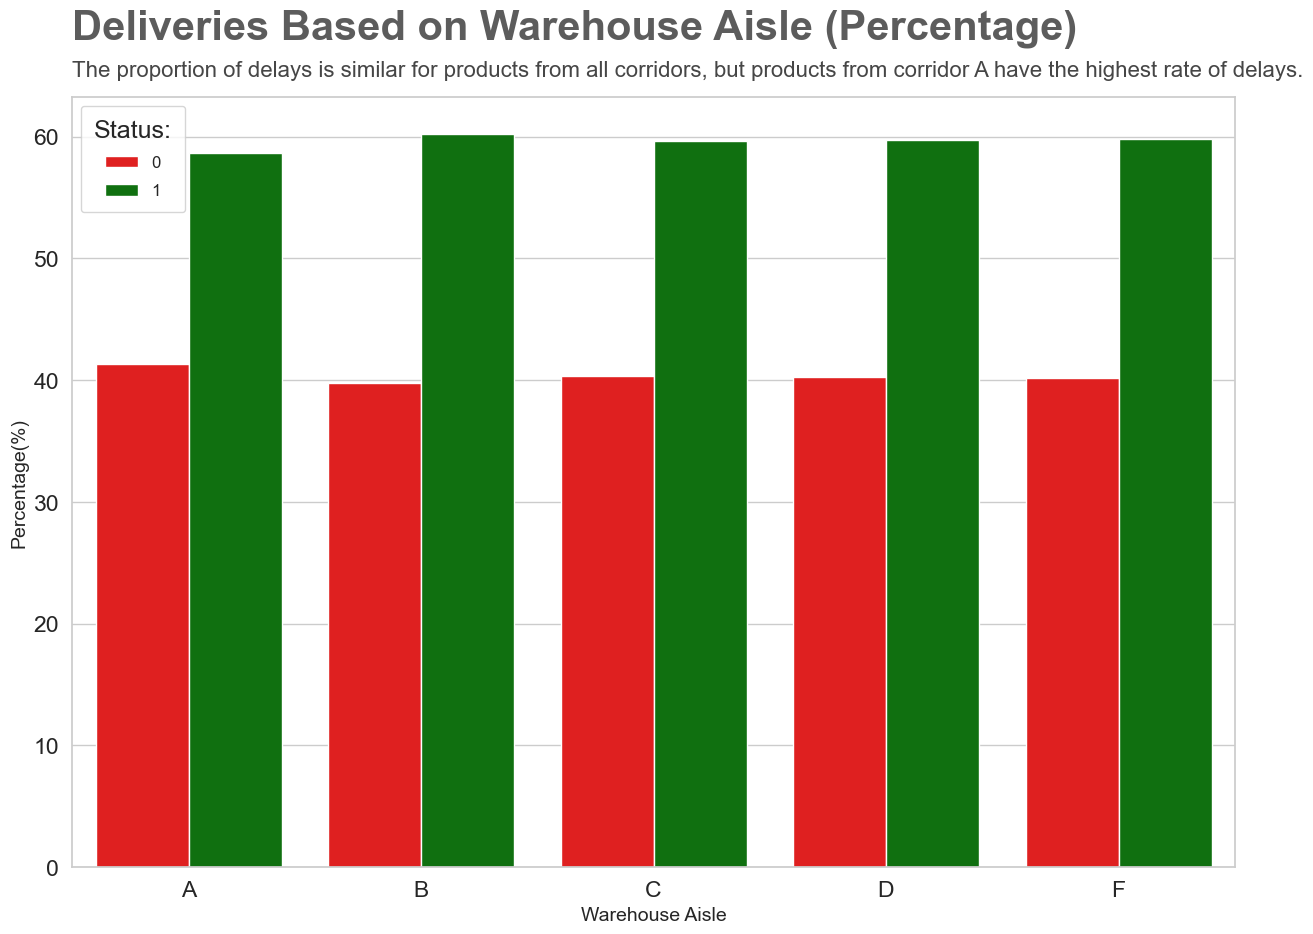

In [67]:
# Graph 2 - Analysis in Percentage Values
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Warehouse Aisle', 
                    y = 'Percentage(%)', 
                    data = df_group25, 
                    hue = 'On Time Delivery Status',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Warehouse Aisle", fontsize = 14)
chart.set_ylabel("Percentage(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 0.8, 
           labelspacing = 0.8, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 68, 
           s = "Deliveries Based on Warehouse Aisle (Percentage)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 65,
           s = 'The proportion of delays is similar for products from all corridors, but products from corridor A have the highest rate of delays.',
           fontsize = 16, 
           alpha = .85);

### How does the density of the variable representing discount influence the delivery status of products?

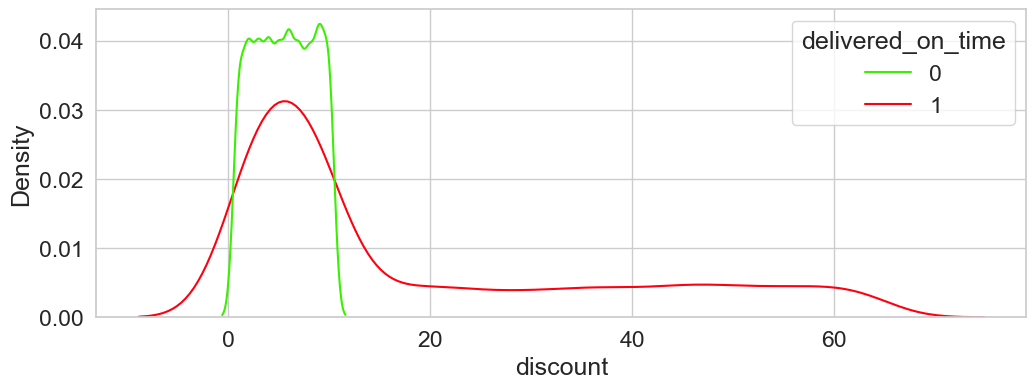

In [68]:
sns.kdeplot(data = df, x = 'discount', hue = 'delivered_on_time');

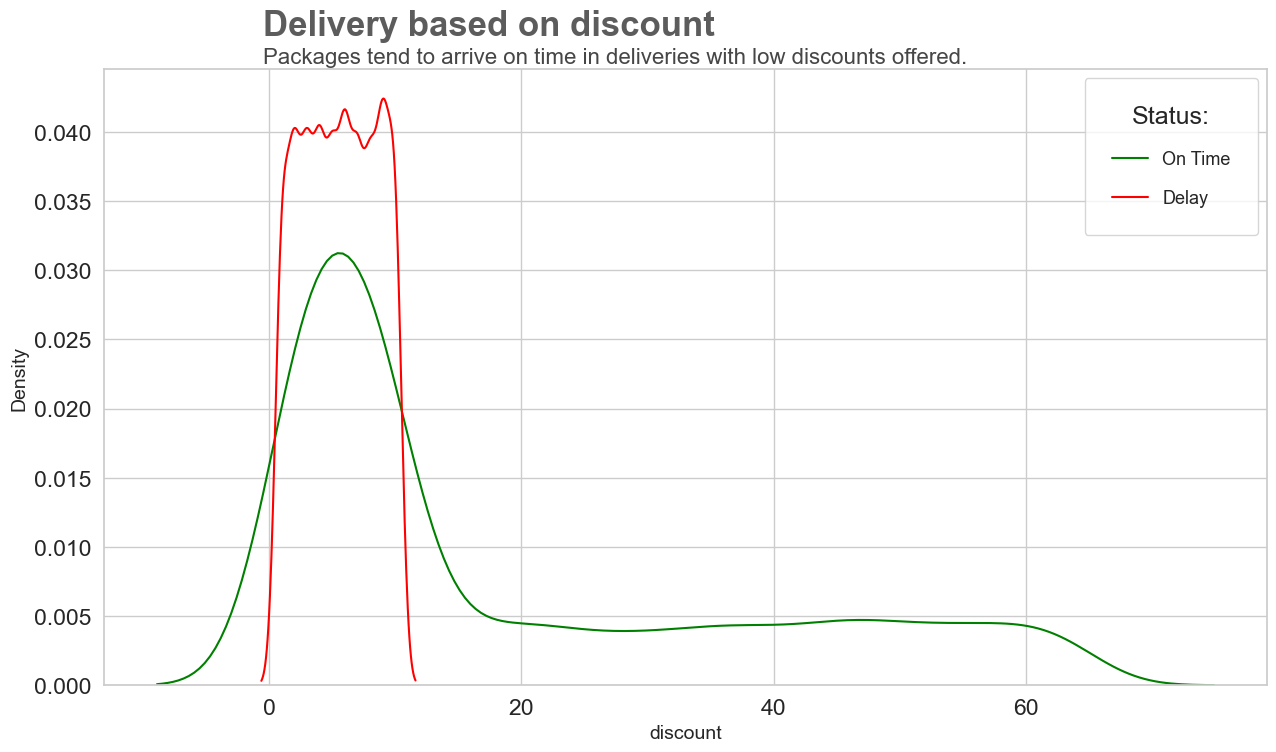

In [69]:
plt.figure(figsize = (15,8))
chart = sns.kdeplot(data = df, 
                    x = 'discount',
                    hue = 'delivered_on_time',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('white')
sns.set_palette('prism')
chart.set_xlabel("discount", fontsize = 14)
chart.set_ylabel("Density", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 13, 
           title = 'Status:', 
           labels = ['On Time', 'Delay'])
chart.text(x = -0.5, 
           y = 0.047, 
           s = "Delivery based on discount",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 0.045,
           s = 'Packages tend to arrive on time in deliveries with low discounts offered.',
           fontsize = 16, 
           alpha = .85);

## Disclaimer: 
A good part of this project was largely done in the Data Science Academy, Big Data Real-Time Analytics with Python and Spark course (part of the Data Scientist training)

# End